In [1]:
import os
while  not 'juxtorpus' in os.listdir():
    os.chdir('../')
assert 'juxtorpus' in os.listdir(), f"Working directory should be at juxtorpus. But at {os.getcwd()}"
f"Working directory: {os.getcwd()}"

'Working directory: /Users/hcha9747/workspace/juxtorpus'

# Intro to Juxtorpus

Juxtorpus is a project that is designed for you to do corpus analysis work in an easy and seamless manner.


The main concept is to have a 'Corpus' unit that you can explore by yourself and pass it along to other corpus analysis tools that are being developed.
A major feature of the Corpus unit is the ability to slice them freely depending on your meta data.

Juxtorpus is one of those tools that you can pass a Corpus unit into to *juxtapose* two corpus.

### This Workshop:
1. Corpora Widget
2. Creating a corpus and storing it in a corpora.
3. Slicing the corpus into 2 different subcorpus.
4. Putting the two subcorpus into Jux for comparisons.

### 1. Creating a Corpus
There are two ways of creating a Corpus and in this workshop we will be creating one using some user-friendly widgets.

When using widgets, it is recommended that you build and store them in a `Corpora`.

Let's create a corpora and invoke `widget()`.

*Quick Tip:*</br>
There are a quite a few classes that you can call `widget()` and you can expect an interactive widget to appear in the output cell. </br>There is also a `render()` if available, which would output a non-interactive visualisation.

#### Widget Steps:
1. Run the cell and you should see a button 'Show Builder'. Click on it.
2. The widget that appeared is the CorpusBuilder (with FileUpload) widget.
3. Upload the file 'Sample_Auspol_Tweets.csv'. Select it and Click 'Confirm' on your right.
4. Use the following configurations:
    + text: document, text
    + created_at: meta, datetime
    + lang: meta, category
5. Deselect all the others.
6. (Optional) Enter a name for the corpus. If not, one will be generated for you.
7. Click Build. Wait for 'Done' on the button.
8. You should now see a selectable corpus in the Corpora panel below.
9. Select it. A slicer panel will appear.
10. Select a datetime range for *created_at* and press the 'Add Operation' button on the right.
11. You will see the operation panel pop down with the one you just created selected.
11. Select a language category for *lang*.
12. Press Slice button. (Note: this is disabled if your subcorpus size is 0 after slicing.)
13. You should now see your subcorpus appear in the Corpora panel.

In [2]:
from juxtorpus.corpus import Corpora

corpora = Corpora()
corpora.widget()

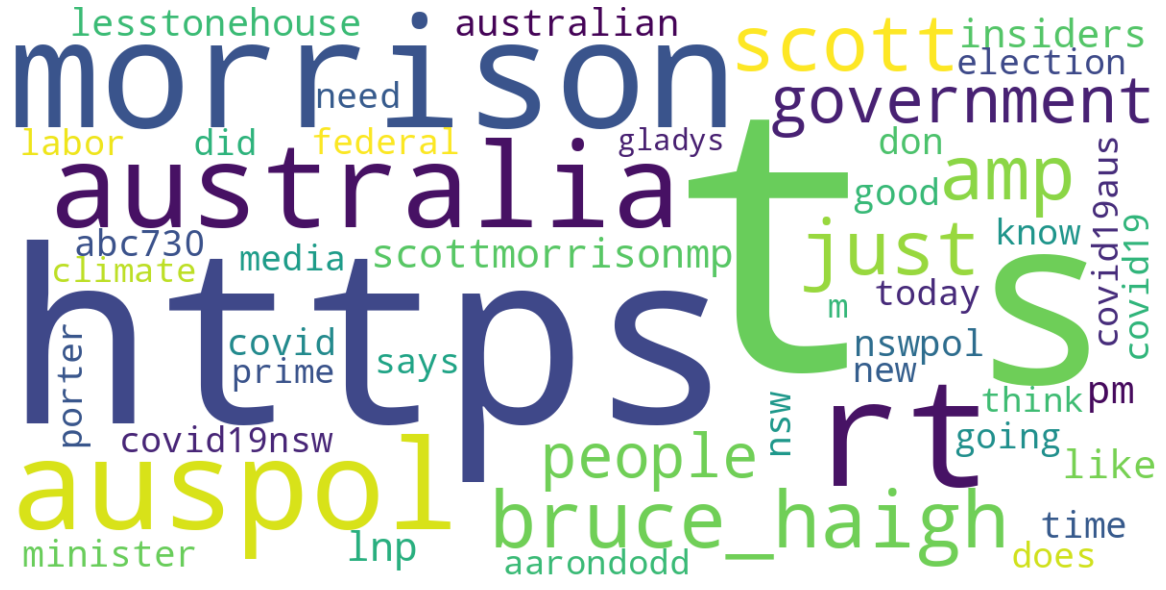

In [19]:
name = 'chocolaty-deadhead'
corpus = corpora.get(name)
assert corpus is not None, 'Please check corpus name'

corpus.viz.wordcloud(max_words=50, metric='tfidf', word_type='word') # try tf, tfidf ; try word, mention, hashtag

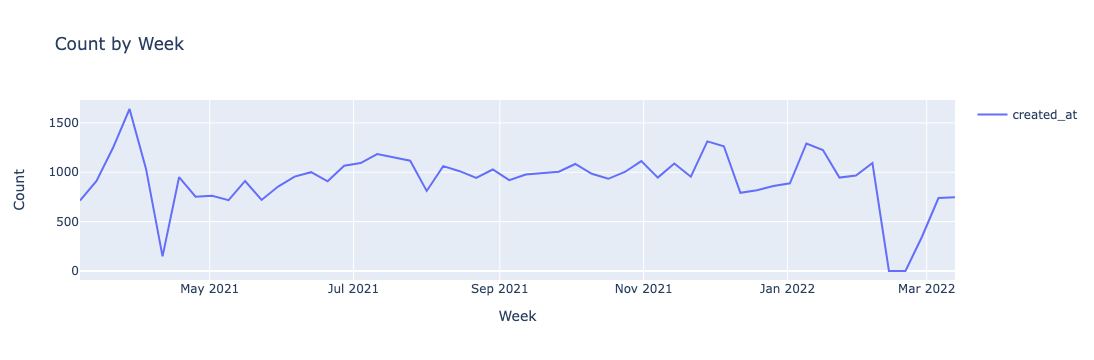

In [20]:
corpus.viz.timeline('created_at', freq='1w')

In [21]:
corpora.get('raw-swift')._dtm_registry.get('tokens')

<DTM 27761 docs X 52248 terms>

In [22]:
corpora.get('raw-swift').dtm

<DTM 27761 docs X 52248 terms>

Currently, corpus.viz only features wordcloud and timeline, but more is expected to come!

### Jux

In [23]:
corpora.widget()

In [24]:
from juxtorpus import Jux

name0 = 'chocolaty-deadhead'
name1 = 'raw-swift'

pair = (corpora.get(name0), corpora.get(name1))
for single in pair: assert single is not None, "At least one of the corpus does not exist in Corpora."

jux = Jux(*pair)

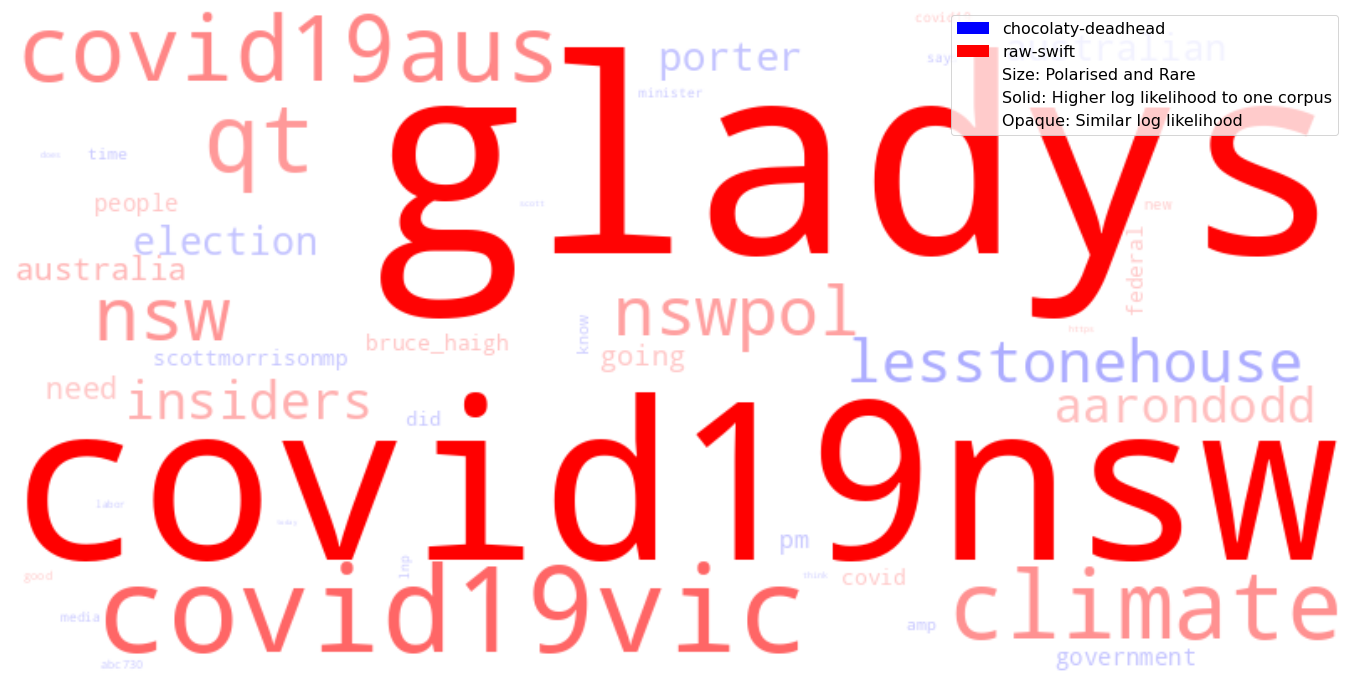

In [25]:
jux.polarity.wordcloud('log_likelihood')   # try: tf, tfidf, log_likelihood